In [1]:
import numpy as np
import sys
sys.path.append('..')  # Needed to allow imports from SMCODES or tests
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
from SMCODES import SmcSolver, TestFunction

Test problem 1
$$
u'(t) = u(t)
$$

In [56]:
%%time
# Test instructions
f = TestFunction(lambda t, x: x)
fsol = lambda t: np.exp(t)

smc = SmcSolver(f, u0=1, hstep=1e-1, stages=4, do_implicit_solve=True)
times, soln = smc.solve()

CPU times: user 425 ms, sys: 3.99 ms, total: 429 ms
Wall time: 429 ms


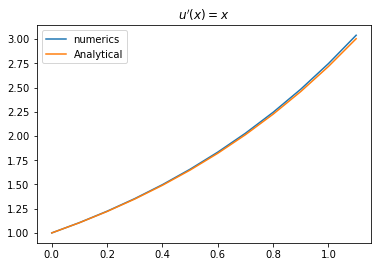

/tmp/ipykernel_814434/4280635238.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(times, np.log10(np.abs((soln.flatten() - np.asarray(fsol(times).flatten()))) ), label='error')


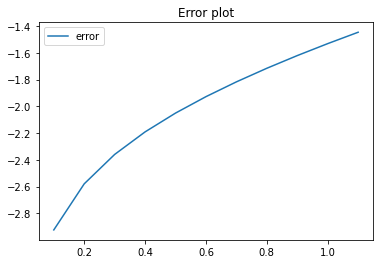

In [53]:

plt.plot(times, soln, label='numerics')
plt.plot(times, fsol(times), label='Analytical')
plt.title(r"$u'(x) = x$")
plt.legend()
plt.show()

plt.plot(times, np.log10(np.abs((soln.flatten() - np.asarray(fsol(times).flatten()))) ), label='error')
plt.title('Error plot')
plt.legend()
plt.show()

1-step convergence rate of method.

In [12]:
# Test instructions

f = TestFunction(lambda t, x: x)
fsol = lambda t: np.exp(t)

stepsizes = [0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
errors = []
for tmax in stepsizes:
    tmax = float(tmax)
    smc = SmcSolver(f, u0=1, hstep=tmax, stages=5, do_implicit_solve=False)
    times, soln = smc.solve(tmax=tmax)
    errors.append( fsol(tmax) - soln[-1].item() )
errors = np.asarray(errors)

In [14]:
errors

array([7.30612455e-04, 6.69844787e-06, 6.64022375e-08, 6.63442634e-10,
       6.63336053e-12, 6.63913369e-14])

In [13]:
ratios = errors/(np.asarray(stepsizes) ** 2)
ratios

array([0.07306125, 0.06698448, 0.06640224, 0.06634426, 0.06633361,
       0.06639134])

$$
\frac{du}{dt} = t
$$

In [17]:
# Test instructions

f = TestFunction(lambda t, x: t)
fsol = lambda t: (t ** 2 + 2)/2
stepsizes = [0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
errors = []
for tmax in stepsizes:
    tmax = float(tmax)
    smc = SmcSolver(f, u0=1, hstep=tmax, stages=5, do_implicit_solve=False)
    times, soln = smc.solve(tmax=tmax)
    errors.append( fsol(tmax) - soln[-1].item() )
errors = np.asarray(errors)

In [18]:
ratios = errors/(np.asarray(stepsizes) ** 2)
ratios

array([0.06633782, 0.06633782, 0.06633782, 0.06633785, 0.06633583,
       0.06639134])

Test problem 3:

$$
u'(t) = u(t) cos(2\pi t)
$$


In [19]:
# Test instructions
k = -1
f = TestFunction(lambda t, x: x * np.cos(2*np.pi*t))
fsol = lambda t: 0.5 * np.exp(np.sin(2*np.pi*t)/(2*np.pi))
stepsizes = [0.1, 5e-2,1e-2,5e-3, 2e-3, 1e-3]
errors = []
tmax = 7
for h in stepsizes:
    print(h)
    smc = SmcSolver(f, u0=0.5, hstep=h, stages=5, do_implicit_solve=False)
    times, soln = smc.solve(tmax=tmax)
    errors.append( fsol(tmax) - soln[-1].item() )
errors = np.asarray(errors)

0.1
0.05
0.01
0.005
0.002
0.001


In [21]:
ratios = errors/(np.asarray(stepsizes) ** 2)
ratios

array([  -3.63012086,   -7.63364283,  -38.47407847,  -76.88052242,
       -192.06245301,  116.07784598])

In [22]:
ratios = errors/(np.asarray(stepsizes) ** 1)
ratios

array([-0.36301209, -0.38168214, -0.38474078, -0.38440261, -0.38412491,
        0.11607785])

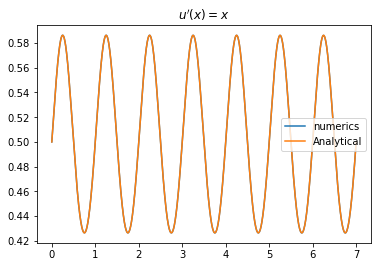

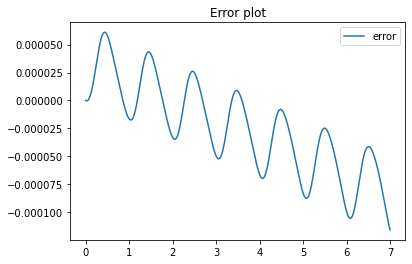

In [23]:
plt.plot(times, soln, label='numerics')
plt.plot(times, fsol(times), label='Analytical')
plt.title(r"$u'(x) = x$")
plt.legend()
plt.show()

plt.plot(times, (soln.flatten() - np.asarray(fsol(times).flatten()) ), label='error')
plt.title('Error plot')
plt.legend()
plt.show()

/tmp/ipykernel_814434/1682540794.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(times, np.log10(np.abs(soln.flatten() - np.asarray(fsol(times)).flatten())), label='Numerical')


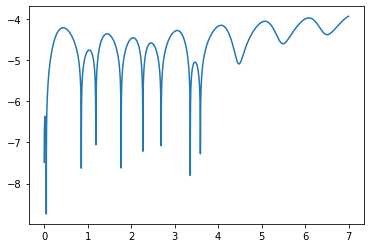

In [24]:
plt.plot(times, np.log10(np.abs(soln.flatten() - np.asarray(fsol(times)).flatten())), label='Numerical')

Example 4
Test problem from 586

$$
u'(t) = \lambda (u(t) - h(t)) + h'(t)
$$

In [40]:
# Test instructions
lam = -100
hfun = lambda t: np.square(np.sin(t))
dh = lambda t: 2*np.sin(t) * np.cos(t)

f = TestFunction(function = (lambda t, x: lam * (x - hfun(t)) + dh(t) ) )

fsol = lambda t: hfun(t)

stepsizes = [5e-2]
errors = []
tmax = 15
for h in stepsizes:
    print(h)
    smc = SmcSolver(f, u0=0.5, hstep=h, stages=5, do_implicit_solve=False)
    times, soln = smc.solve(tmax=tmax)
    errors.append( fsol(tmax) - soln[-1].item() )
errors = np.asarray(errors)

0.05


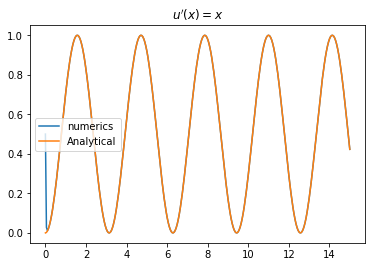

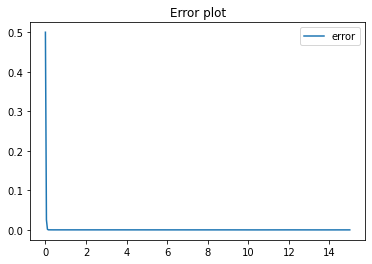

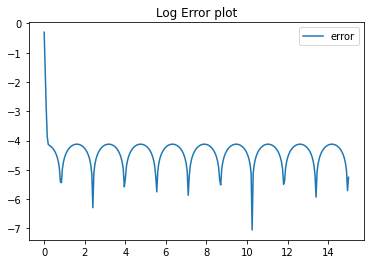

In [41]:
plt.plot(times, soln, label='numerics')
plt.plot(times, fsol(times), label='Analytical')
plt.title(r"$u'(x) = x$")
plt.legend()
plt.show()

plt.plot(times, (soln.flatten() - np.asarray(fsol(times).flatten()) ), label='error')
plt.title('Error plot')
plt.legend()
plt.show()

plt.plot(times, np.log10(np.abs(soln.flatten() - np.asarray(fsol(times).flatten())) ), label='error')
plt.title('Log Error plot')
plt.legend()
plt.show()

Example 5
Stiff Test problem from Atkinson

https://homepage.math.uiowa.edu/~atkinson/papers/NAODE_Book.pdf

Solves 

$$
u'(t) = \lambda u(t) + (1 - \lambda) \cos(t) - (1 + \lambda) \sin(t)
$$

$$
u(t) = sin(t) + cos(t)
$$

In [42]:
# Test instructions
lam = -10
hfun = lambda t: np.square(np.sin(t))
dh = lambda t: 2*np.sin(t) * np.cos(t)

f = TestFunction(function = (lambda t, x: lam * x + ( 1 - lam) * np.cos(t) - (1 + lam)*np.sin(t) ) )

fsol = lambda t: np.sin(t) + np.cos(t)

stepsizes = [1e-1]
errors = []
tmax = 10
for h in stepsizes:
    print(h)
    smc = SmcSolver(f, u0=1, hstep=h, stages=5, do_implicit_solve=False)
    times, soln = smc.solve(tmax=tmax)
    errors.append( fsol(tmax) - soln[-1].item() )
errors = np.asarray(errors)

0.1


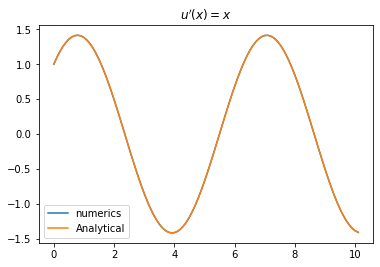

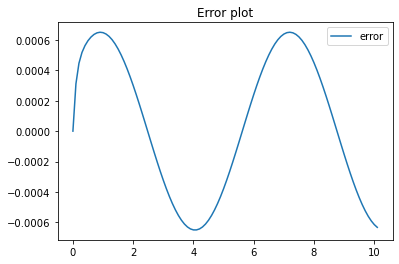

/tmp/ipykernel_814434/3466609870.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(times, np.log10(np.abs(soln.flatten() - np.asarray(fsol(times).flatten())) ), label='error')


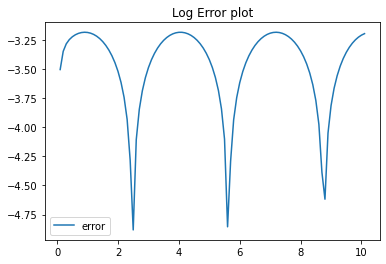

In [43]:
plt.plot(times, soln, label='numerics')
plt.plot(times, fsol(times), label='Analytical')
plt.title(r"$u'(x) = x$")
plt.legend()
plt.show()

plt.plot(times, (soln.flatten() - np.asarray(fsol(times).flatten()) ), label='error')
plt.title('Error plot')
plt.legend()
plt.show()

plt.plot(times, np.log10(np.abs(soln.flatten() - np.asarray(fsol(times).flatten())) ), label='error')
plt.title('Log Error plot')
plt.legend()
plt.show()